In [1]:
import pandas as pd

In [2]:
languages = pd.read_csv('languages_and_dialects_geo.csv')

In [3]:
print(languages.describe(include='all'))

       glottocode        name isocodes    level macroarea     latitude  \
count       22111       22111     8121    22111     22019  8849.000000   
unique      22111       22111     8121        2         6          NaN   
top      3adt1234  3Ad-Tekles      aiw  dialect   Eurasia          NaN   
freq            1           1        1    13507      7011          NaN   
mean          NaN         NaN      NaN      NaN       NaN     8.935550   
std           NaN         NaN      NaN      NaN       NaN    19.603034   
min           NaN         NaN      NaN      NaN       NaN   -55.274800   
25%           NaN         NaN      NaN      NaN       NaN    -5.086930   
50%           NaN         NaN      NaN      NaN       NaN     6.842170   
75%           NaN         NaN      NaN      NaN       NaN    21.572100   
max           NaN         NaN      NaN      NaN       NaN    73.135400   

          longitude  
count   8849.000000  
unique          NaN  
top             NaN  
freq            NaN  
m

In [4]:
print(f"The database has {len(languages)} entries on languiges and databases.")

The database has 22111 entries on languiges and databases.


In [5]:
print(f"The full area of macroareas are{languages['macroarea'].unique()}")

The full area of macroareas are['Africa' 'Papunesia' 'Eurasia' 'South America' 'North America'
 'Australia' nan]


In [6]:
print(f"There are {languages['isocodes'].notna().sum()} languages and dialects with the ISO 639-3 code.")

There are 8121 languages and dialects with the ISO 639-3 code.


In [7]:
print(f"We have latitude and longitude data for {languages['latitude'].notna().sum()} languages and dialects.")

We have latitude and longitude data for 8849 languages and dialects.


In [8]:
languages = languages[languages['level'] != 'dialect']

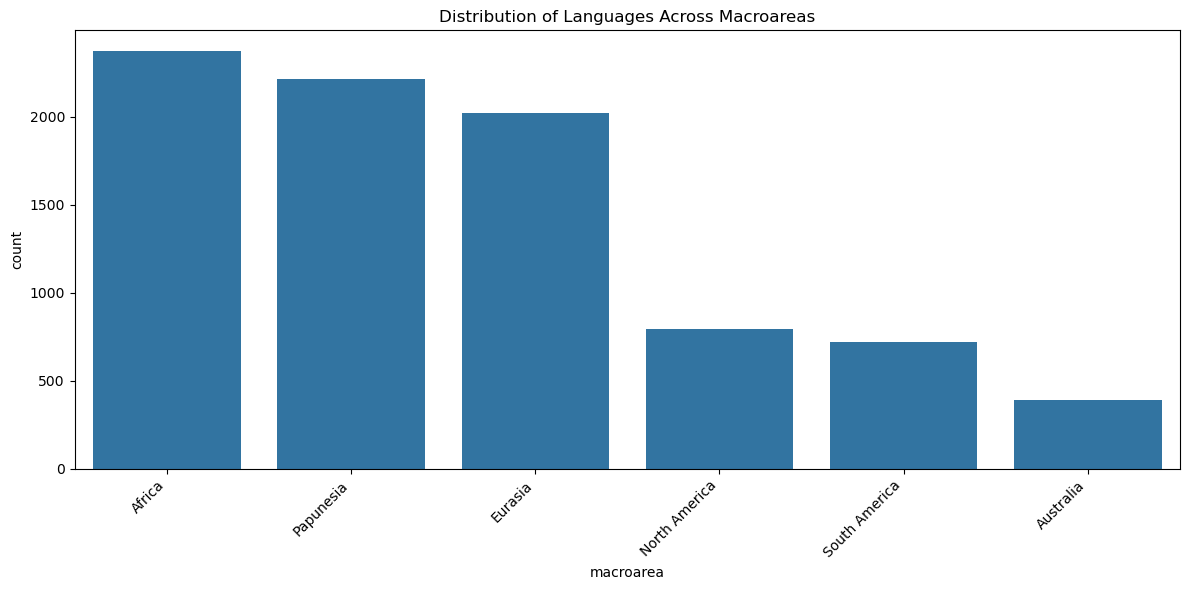

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=languages, x='macroarea', order = languages['macroarea'].value_counts().index)
plt.title('Distribution of Languages Across Macroareas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

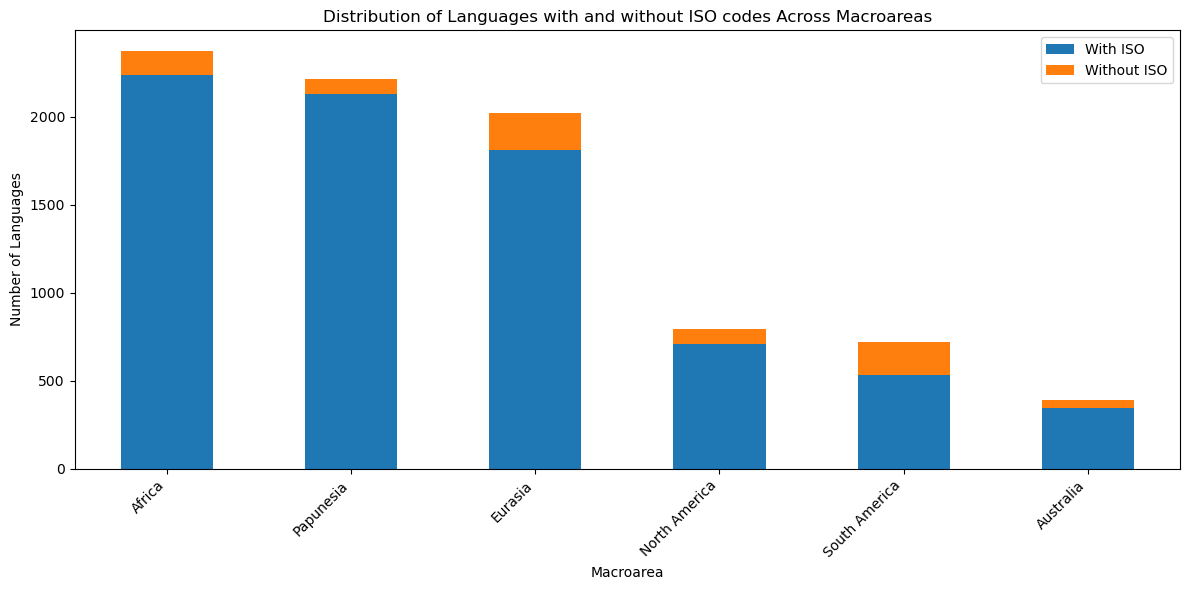

In [10]:
macroarea_counts = languages['macroarea'].value_counts()
macroarea_iso_counts = languages[languages['isocodes'].notna()]['macroarea'].value_counts()
df_macroarea = pd.DataFrame({'Total': macroarea_counts, 'With ISO': macroarea_iso_counts}).fillna(0)

df_macroarea['Without ISO'] = df_macroarea['Total'] - df_macroarea['With ISO']
df_macroarea[['With ISO', 'Without ISO']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Languages with and without ISO codes Across Macroareas')
plt.xlabel('Macroarea')
plt.ylabel('Number of Languages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
northernmost = languages.loc[languages['latitude'].idxmax()]
southernmost = languages.loc[languages['latitude'].idxmin()]

print("Northernmost Language:")
print(f"Name: {northernmost['name']}, Macroarea: {northernmost['macroarea']}, Latitude: {northernmost['latitude']}")

print("\nSouthernmost Language:")
print(f"Name: {southernmost['name']}, Macroarea: {southernmost['macroarea']}, Latitude: {southernmost['latitude']}")

Northernmost Language:
Name: Nganasan, Macroarea: Eurasia, Latitude: 73.1354

Southernmost Language:
Name: Yámana, Macroarea: South America, Latitude: -55.2748


In [12]:
tropical_languages = languages[(languages['latitude'] >= -23.43619) & (languages['latitude'] <= 23.43619)]
percentage = (len(tropical_languages) / len(languages)) * 100

print(f"{percentage:.2f}% of the world's languages are spoken in the tropics.")

73.18% of the world's languages are spoken in the tropics.


In [13]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    a = np.sin((lat2 - lat1)/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2 - lon1)/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

languages['distance_to_northernmost'] = languages.apply(
    lambda row: haversine(northernmost['latitude'], northernmost['longitude'], row['latitude'], row['longitude']),
    axis=1
)

furthest_language = languages.loc[languages['distance_to_northernmost'].idxmax()]

print("Language Furthest from Northernmost Language:")
print(f"Name: {furthest_language['name']}, Macroarea: {furthest_language['macroarea']}, Latitude: {furthest_language['latitude']}, Longitude: {furthest_language['longitude']}")
print(f"Distance: {furthest_language['distance_to_northernmost']} km")

print("\nSouthernmost Language:")
print(f"Name: {southernmost['name']}, Macroarea: {southernmost['macroarea']}, Latitude: {southernmost['latitude']}, Longitude: {southernmost['longitude']}")

distance_southernmost_to_northernmost = haversine(northernmost['latitude'], northernmost['longitude'], southernmost['latitude'], southernmost['longitude'])
print(f"\nDistance between Northernmost and Southernmost Language: {distance_southernmost_to_northernmost} km")

if furthest_language['name'] == southernmost['name']:
    print("\nThe language furthest from the northernmost language is the southernmost language.")
else:
    print("\nThe language furthest from the northernmost language is NOT the southernmost language.")

Language Furthest from Northernmost Language:
Name: Yámana, Macroarea: South America, Latitude: -55.2748, Longitude: -68.2648
Distance: 17717.541945364123 km

Southernmost Language:
Name: Yámana, Macroarea: South America, Latitude: -55.2748, Longitude: -68.2648

Distance between Northernmost and Southernmost Language: 17717.541945364123 km

The language furthest from the northernmost language is the southernmost language.


Q1 (25th percentile): -5.0245
Q3 (75th percentile): 20.16
The latitude range is not symmetric around the equator.


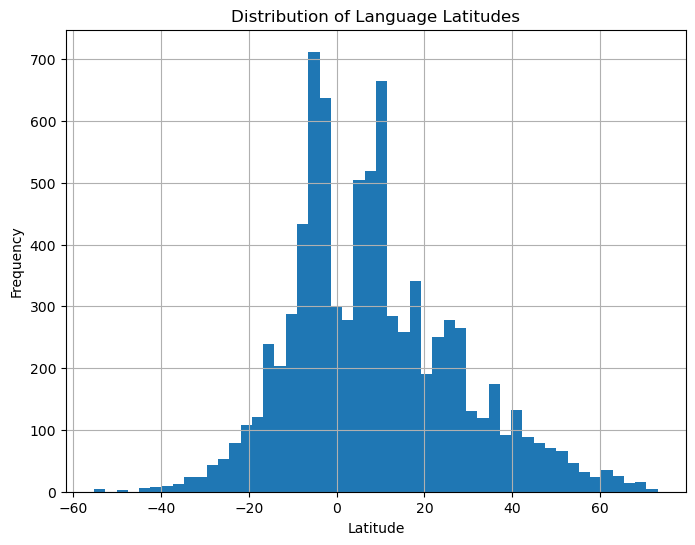

In [14]:
q1 = languages['latitude'].quantile(0.25)
q3 = languages['latitude'].quantile(0.75)

print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")

if abs(q1 + q3) < 1e-6:
    print("The latitude range is symmetric around the equator.")
else:
    print("The latitude range is not symmetric around the equator.")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
languages['latitude'].hist(bins=50)
plt.title('Distribution of Language Latitudes')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

Estimated Areas of Macroareas:
Africa: 41283530.21 sq km
Eurasia: 93739244.75 sq km
Papunesia: 96172628.53 sq km
South America: 34923518.88 sq km
North America: 49023814.70 sq km
Australia: 12205632.56 sq km


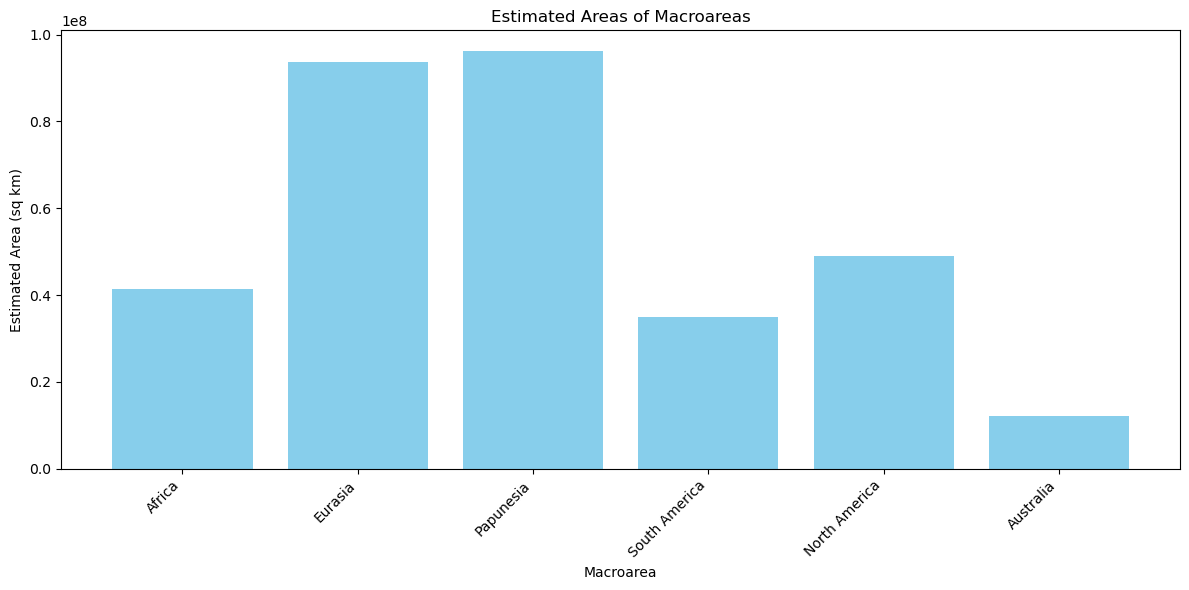

In [15]:
import numpy as np

def estimate_area(macroarea_name, num_pairs=1000):
    macroarea_languages = languages[languages['macroarea'] == macroarea_name].dropna(subset=['latitude', 'longitude'])
    
    if len(macroarea_languages) < 2:
        print(f"Not enough language data for {macroarea_name} to estimate area.")
        return None

    distances = []
    for _ in range(num_pairs):
        if len(macroarea_languages) < 2:
            break
        lang_sample = macroarea_languages.sample(2)
        lang1 = lang_sample.iloc[0]
        lang2 = lang_sample.iloc[1]
        dist = haversine(lang1['latitude'], lang1['longitude'], lang2['latitude'], lang2['longitude'])
        distances.append(dist)
    
    if not distances:
        print(f"Could not compute distances for {macroarea_name}.")
        return None
    
    distances = sorted(distances, reverse=True)
    a = distances[0]
    b = distances[1] if len(distances) > 1 else a  # If only one distance, assume a=b
    
    area = np.pi * (a / 2) * (b / 2)
    return area

macroareas = languages['macroarea'].unique()
macroarea_areas = {}

for macroarea in macroareas:
    if isinstance(macroarea, str):
        area = estimate_area(macroarea)
        if area is not None:
            macroarea_areas[macroarea] = area

print("Estimated Areas of Macroareas:")
for macroarea, area in macroarea_areas.items():
    print(f"{macroarea}: {area:.2f} sq km")


macroarea_names = list(macroarea_areas.keys())
areas = list(macroarea_areas.values())

plt.figure(figsize=(12, 6))
plt.bar(macroarea_names, areas, color='skyblue')
plt.xlabel('Macroarea')
plt.ylabel('Estimated Area (sq km)')
plt.title('Estimated Areas of Macroareas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Language Densities by Macroarea (languages per sq km):
Africa: 5.750477e-05
Eurasia: 2.158114e-05
Papunesia: 2.303150e-05
South America: 2.055921e-05
North America: 1.617581e-05
Australia: 3.187053e-05


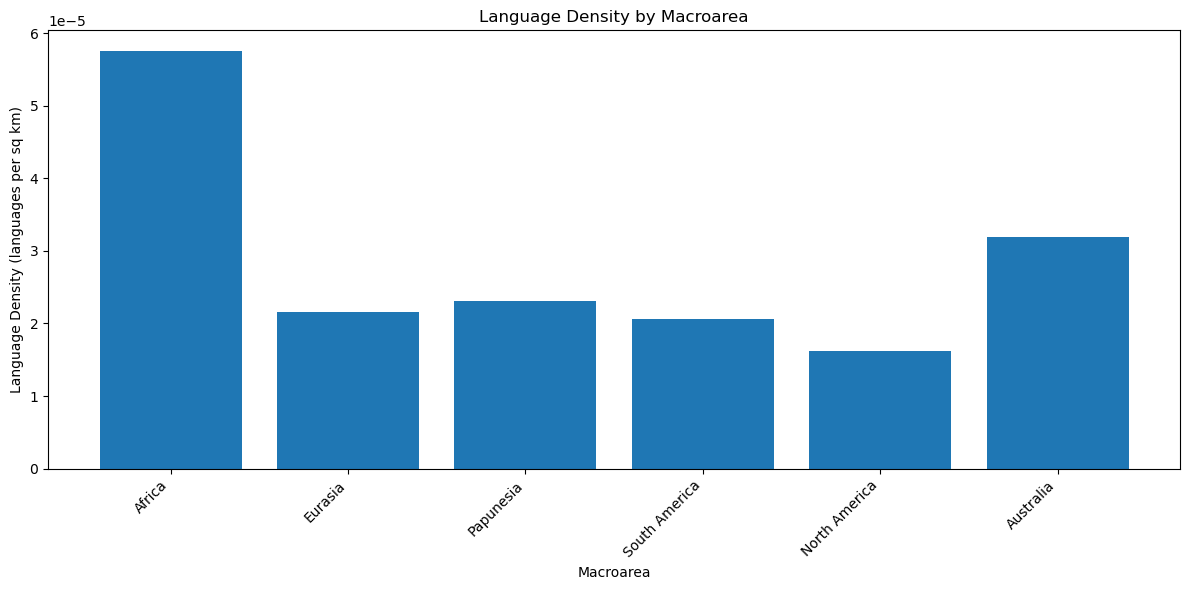

In [16]:
language_densities = {}

for macroarea in macroarea_areas:
    if macroarea in macroarea_counts:
        language_densities[macroarea] = macroarea_counts[macroarea] / macroarea_areas[macroarea]

print("Language Densities by Macroarea (languages per sq km):")
for macroarea, density in language_densities.items():
    print(f"{macroarea}: {density:.6e}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(language_densities.keys(), language_densities.values())
plt.xlabel('Macroarea')
plt.ylabel('Language Density (languages per sq km)')
plt.title('Language Density by Macroarea')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()